In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G_erdos = nx.erdos_renyi_graph(1000, 0.002)
G_barabasi = nx.barabasi_albert_graph(1000, 1)

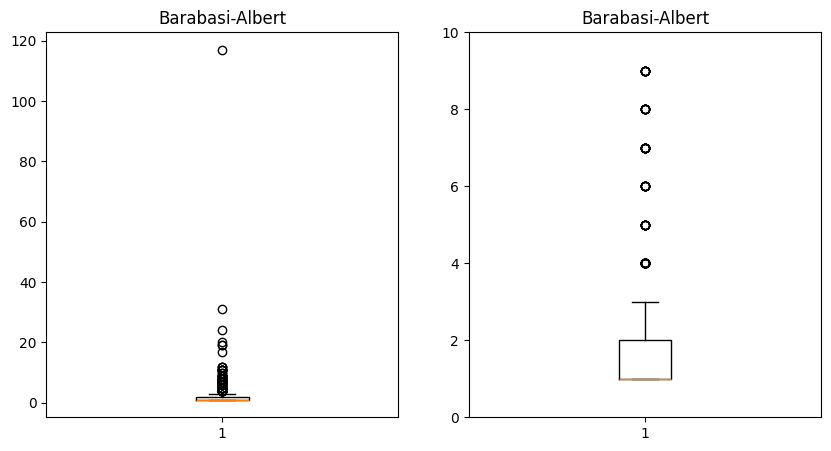

In [35]:
degree_sequence = [d for n, d in G_barabasi.degree()]

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.boxplot(degree_sequence)
plt.title('Barabasi-Albert')

degree_sequence = [d for d in degree_sequence if d < 10]
plt.subplot(122)
plt.boxplot(degree_sequence)
plt.ylim(0, 10)
plt.title('Barabasi-Albert')

plt.show()

In [36]:
giant_component_size = max(len(c) for c in nx.connected_components(G_barabasi))
giant_component_size

1000

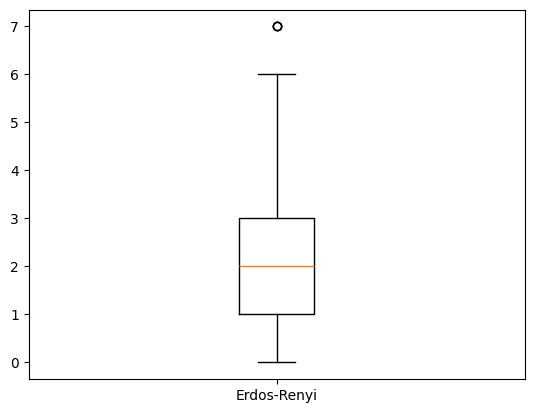

In [21]:
degree_sequence = [d for n, d in G_erdos.degree()]
plt.boxplot([degree_sequence], labels=['Erdos-Renyi'])
plt.show()

In [2]:
import numpy as np

def initialize_sand(G):
    G_degree = dict(G.degree())

    value_dict = {}
    for key, value in G_degree.items():
        if value == 0:
            value_dict[key] = 0
        else:
            random_value = np.random.randint(0, value)
            value_dict[key] = random_value
    
    nx.set_node_attributes(G, value_dict, 'sand')
    return

In [3]:
initialize_sand(G_erdos)
initialize_sand(G_barabasi)

In [9]:
def drop_sand(G, node, depth, visited_nodes = []):
    sand_count = G.nodes[node]['sand']
    node_degree = G.degree[node]

    if node_degree == 0:
        return depth
    
    if len(visited_nodes) == 4 and visited_nodes[0] == visited_nodes[2] and visited_nodes[1] == visited_nodes[3]:
        return depth
    
    if sand_count < node_degree:
        G.nodes[node]['sand'] += 1
    else:
        neighbors = list(G.neighbors(node))
        G.nodes[node]['sand'] = 1  #maybe is 1
        visited_nodes2 = visited_nodes + [node]
        if len(visited_nodes2) > 4:
            visited_nodes2.pop(0)

        for neighbor in neighbors:
            if np.random.rand() < (1/1000):
                continue
            return drop_sand(G, neighbor, depth + 1, visited_nodes2)
    return depth

In [16]:
G_bueno = G_erdos.copy()

avalanche = []
for i in range(10000):
    random_node = np.random.randint(0, G_bueno.number_of_nodes())
    avalanche.append(drop_sand(G_bueno, random_node, 0))

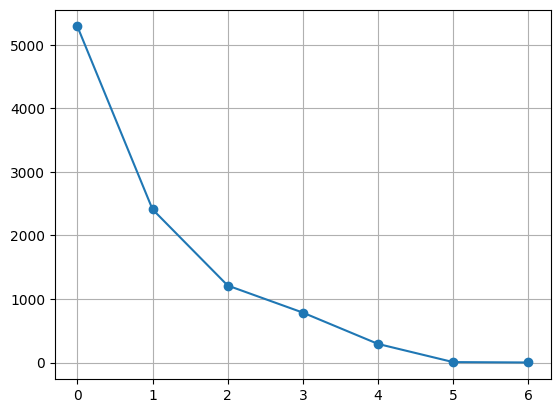

In [17]:
avalanche = np.array(avalanche)
unique, counts = np.unique(avalanche, return_counts=True)

plt.plot(unique, counts, 'o-')
plt.grid()
plt.show()

In [14]:
G_malo = G_barabasi.copy()

avalanche_2 = []
for i in range(10000):
    random_node = np.random.randint(0, G_malo.number_of_nodes())
    avalanche_2.append(drop_sand(G_malo, random_node, 0))

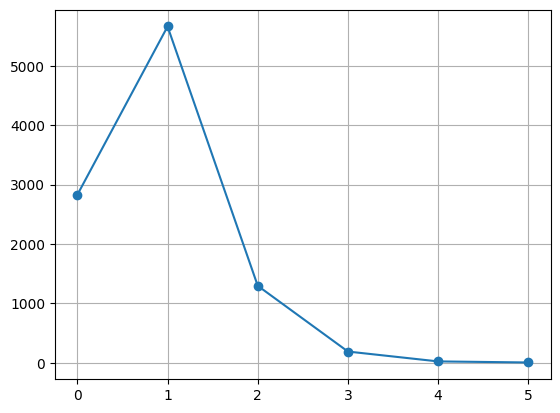

In [15]:
avalanche_2 = np.array(avalanche_2)
unique, counts = np.unique(avalanche_2, return_counts=True)

plt.plot(unique, counts, 'o-')
plt.grid()
plt.show()